In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# AAPL.csv 로드 -> 인덱스 지정 
df = pd.read_csv("../csv/AAPL.csv")
df.head()

In [ ]:
# 인덱스를 지정하는 함수 set_index()
df.set_index('Date')[['Adj Close']]

In [14]:
# read_csv()에서 인덱스를 지정하고 사용할 컬럼을 지정 
df2 = \
    pd.read_csv("../csv/AAPL.csv", 
                usecols=['Date', 'Adj Close'], index_col='Date')

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9715 entries, 1980-12-12 to 2019-06-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  9714 non-null   float64
dtypes: float64(1)
memory usage: 151.8+ KB


In [16]:
# 결측치가 존재하는 데이터를 확인 
df2.isna().sum()

Adj Close    1
dtype: int64

In [20]:
df2['Adj Close'].isna()

Date
1980-12-12    False
1980-12-15    False
1980-12-16    False
1980-12-17    False
1980-12-18    False
              ...  
2019-06-18    False
2019-06-19    False
2019-06-20    False
2019-06-21    False
2019-06-24    False
Name: Adj Close, Length: 9715, dtype: bool

In [21]:
df2.loc[
    df2['Adj Close'].isna(), 
]

,Adj Close
Date,
1981-08-10,NaN


In [22]:
from datetime import datetime

In [23]:
index_list = df2.loc[
    df2['Adj Close'].isna(), 
].index

In [31]:
for idx in index_list:
    # print(type(idx))
    # 인덱스의 문자열을 시계열데이터로 변환
    time_idx = datetime.strptime(idx, '%Y-%m-%d')
    # print(time_idx)
    # 시계열 데이터에서 요일을 추출하려 문자로 출력 
    print(time_idx.strftime('%A'))


Monday


In [33]:
# 결측치를 제외한다.
df2.dropna(axis=0, inplace=True)

In [ ]:
# 이동평균선 -> 오늘에서부터 과거의 n개의 데이터를 
# 모아서 평균을 낸 데이터
# 20일 평균선  -> 첫데이터에서 20일 후부터 생성이되는 데이터 
# 20번째의 데이터에서 첫 이동평균선 데이터가 생성
df2.iloc[ 0:20, 0].mean() # df2.iloc[ 19, 1] 대입
df2.iloc[ 1:21, 0].mean() # df2.iloc[ 20, 1] 대입
# df2.iloc[ i + 19, 1 ] = df2.iloc[i : i+20, 0].mean()

np.float64(0.4432777)

In [40]:
import numpy as np

In [41]:
df2['center'] = np.nan

In [44]:
for i in range( len(df2) - 19 ):
    df2.iloc[i + 19, 1] = df2.iloc[ i : i + 20 , 0 ].mean()

In [47]:
df2.iloc[18:22]

,Adj Close,center
Date,,
1981-01-09,0.455147,NaN
1981-01-12,0.451577,0.443278
1981-01-13,0.435513,0.444527
1981-01-14,0.437298,0.446937


In [48]:
df2['while_center'] = np.nan

In [49]:
i = 0

while True:
    try:
        df2.iloc[i + 19, 2] = df2.iloc[ i : i + 20 , 0 ].mean()
        i += 1
    except:
        break

In [ ]:
df2.tail()

In [53]:
# 데이터를 n개 만큼 묶여서 그룹화 함수 
# rolling(n)
df2['center2'] = df2['Adj Close'].rolling(20).mean()

In [55]:
# 인덱스를 시계열 변환
df2.index = pd.to_datetime(df2.index)

In [57]:
df2 = df2.tail(100)

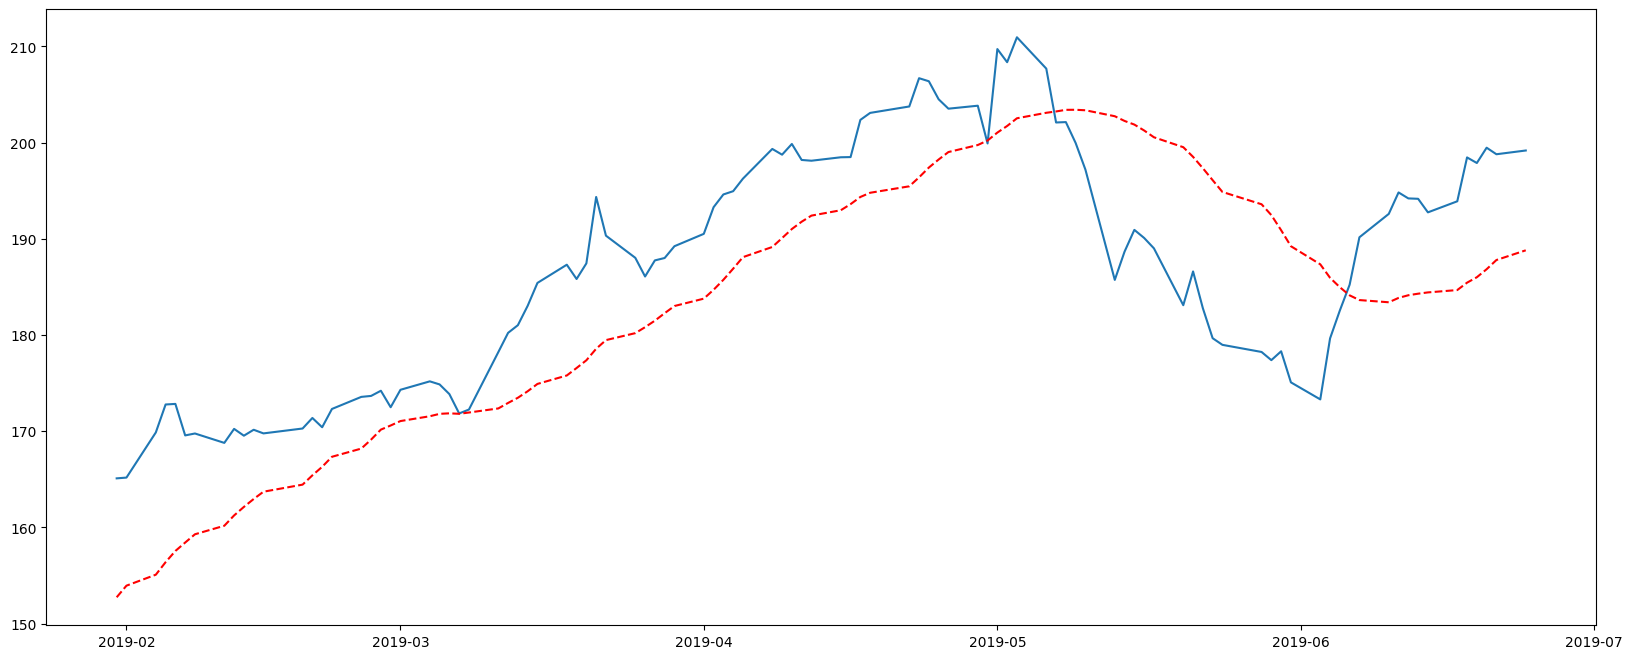

In [58]:
plt.figure(figsize=(20, 8))

plt.plot(df2.index, df2['Adj Close'])
plt.plot(df2.index, df2['center'], 'r--')

plt.show()